# benchmarking on omnipath


In [1]:
from scprint import scPrint
from scprint.tasks import GRNfer

from bengrn import BenGRN
import scanpy as sc

from bengrn.base import train_classifier

from anndata.utils import make_index_unique
from bengrn import compute_genie3
from grnndata import utils as grnutils
import numpy as np

%load_ext autoreload
%autoreload 2 

import torch
torch.set_float32_matmul_precision('medium')

💡 connected lamindb: jkobject/scprint


/pasteur/appa/homes/jkalfon/miniconda3/envs/scprint17/lib/python3.10/site-packages/umap/__init__.py:9: ImportWarning: Tensorflow not installed; ParametricUMAP will be unavailable
  warn(


In [2]:
model = scPrint.load_from_checkpoint(
#    '../data/temp/o2uniqsx/epoch=18-step=133000.ckpt', precpt_gene_emb=None)
    '/pasteur/zeus/projets/p02/ml4ig_hot/Users/jkalfon/scprint_scale/o2uniqsx/checkpoints/epoch=18-step=133000.ckpt', precpt_gene_emb=None)
NUM_GENES = 5000
MAXCELLS = 1024

2024-06-28 16:56:31,499:INFO - Created a temporary directory at /local/scratch/tmp/tmpv7bg_9_m


2024-06-28 16:56:31,501:INFO - Writing /local/scratch/tmp/tmpv7bg_9_m/_remote_module_non_scriptable.py


RuntimeError caught: scPrint is not attached to a `Trainer`.


In [3]:
CELLTYPES = [
    'kidney distal convoluted tubule epithelial cell',
    'kidney loop of Henle thick ascending limb epithelial cell',
    'kidney collecting duct principal cell',
    'mesangial cell',
    'blood vessel smooth muscle cell',
    'podocyte',
    'macrophage',
    'leukocyte',
    'kidney interstitial fibroblast',
    'endothelial cell'
]

In [4]:
#adata = sc.read_h5ad('/home/ml4ig1/scprint/.lamindb/yBCKp6HmXuHa0cZptMo7.h5ad')
adata = sc.read_h5ad('../data/yBCKp6HmXuHa0cZptMo7.h5ad')
adata.var["isTF"] = False
adata.var.loc[adata.var.symbol.isin(grnutils.TF), "isTF"] = True
adata

AnnData object with n_obs × n_vars = 15728 × 70116
    obs: 'donor_id', 'self_reported_ethnicity_ontology_term_id', 'organism_ontology_term_id', 'sample_uuid', 'sample_preservation_method', 'tissue_ontology_term_id', 'development_stage_ontology_term_id', 'tissue_section_uuid', 'tissue_section_thickness', 'library_uuid', 'assay_ontology_term_id', 'mapped_reference_annotation', 'is_primary_data', 'cell_type_ontology_term_id', 'author_cell_type', 'disease_ontology_term_id', 'sex_ontology_term_id', 'suspension_type', 'cell_type', 'assay', 'disease', 'organism', 'sex', 'tissue', 'self_reported_ethnicity', 'development_stage', 'cell_culture', 'nnz', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_20_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'log1p_total_counts_hb', 'pct_counts_hb', 'outlier', 'mt_outlier', 'leiden_3', 'leide

Using 16bit Automatic Mixed Precision (AMP)


GPU available: True (cuda), used: True


TPU available: False, using: 0 TPU cores


IPU available: False, using: 0 IPUs


HPU available: False, using: 0 HPUs


/pasteur/appa/homes/jkalfon/scPRINT/scprint/tasks/grn.py:165: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  organisms=[subadata.obs['organism_ontology_term_id'][0]],


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


SLURM auto-requeueing enabled. Setting signal handlers.


Predicting: |          | 0/? [00:00<?, ?it/s]

avg link count: 536246649, sparsity: 1.0


base enrichment


too many genes for central computation


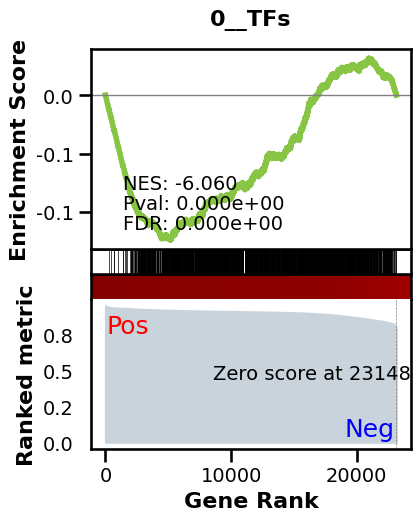

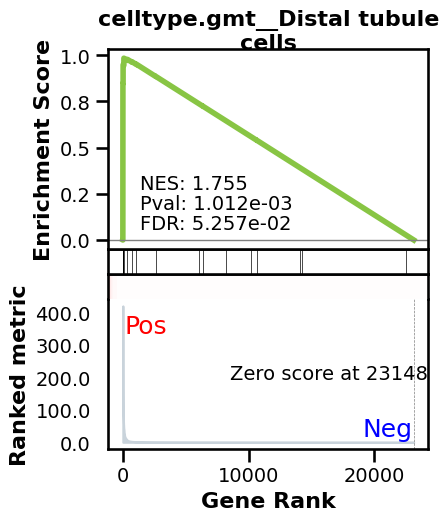

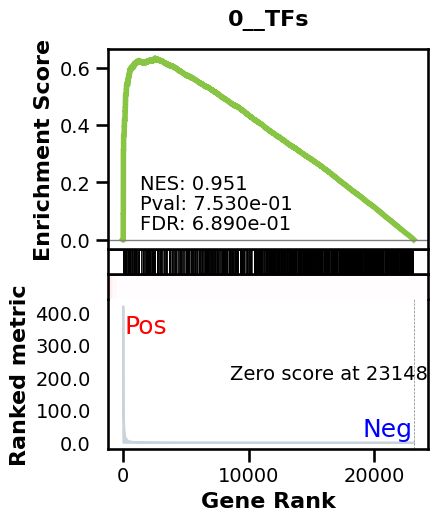

_________________________________________
TF specific enrichment


found some significant results for  62.5 % TFs

_________________________________________
loading GT,  omnipath


intersection of 12455 genes
intersection pct: 0.5380362002678302


precision:  0.0008896322223674437 
recall:  1.0 
random precision: 0.0008897036558203398


  0%|          | 0/128 [00:00<?, ?it/s]

  1%|          | 1/128 [00:00<00:32,  3.91it/s]

  2%|▏         | 2/128 [00:00<00:32,  3.88it/s]

  2%|▏         | 3/128 [00:00<00:32,  3.87it/s]

  3%|▎         | 4/128 [00:01<00:32,  3.86it/s]

  4%|▍         | 5/128 [00:01<00:31,  3.85it/s]

  5%|▍         | 6/128 [00:01<00:31,  3.83it/s]

  5%|▌         | 7/128 [00:01<00:31,  3.83it/s]

  6%|▋         | 8/128 [00:02<00:31,  3.83it/s]

  7%|▋         | 9/128 [00:02<00:31,  3.82it/s]

  8%|▊         | 10/128 [00:02<00:30,  3.83it/s]

  9%|▊         | 11/128 [00:02<00:30,  3.83it/s]

  9%|▉         | 12/128 [00:03<00:30,  3.83it/s]

 10%|█         | 13/128 [00:03<00:30,  3.82it/s]

 11%|█         | 14/128 [00:03<00:29,  3.82it/s]

 12%|█▏        | 15/128 [00:03<00:29,  3.81it/s]

 12%|█▎        | 16/128 [00:04<00:29,  3.82it/s]

 13%|█▎        | 17/128 [00:04<00:29,  3.80it/s]

 14%|█▍        | 18/128 [00:04<00:28,  3.81it/s]

 15%|█▍        | 19/128 [00:04<00:28,  3.81it/s]

 16%|█▌        | 20/128 [00:05<00:28,  3.81it/s]

 16%|█▋        | 21/128 [00:05<00:28,  3.82it/s]

 17%|█▋        | 22/128 [00:05<00:27,  3.83it/s]

 18%|█▊        | 23/128 [00:06<00:27,  3.83it/s]

 19%|█▉        | 24/128 [00:06<00:27,  3.84it/s]

 20%|█▉        | 25/128 [00:06<00:26,  3.85it/s]

 20%|██        | 26/128 [00:06<00:26,  3.85it/s]

 21%|██        | 27/128 [00:07<00:26,  3.85it/s]

 22%|██▏       | 28/128 [00:07<00:26,  3.84it/s]

 23%|██▎       | 29/128 [00:07<00:25,  3.84it/s]

 23%|██▎       | 30/128 [00:07<00:25,  3.85it/s]

 24%|██▍       | 31/128 [00:08<00:25,  3.85it/s]

 25%|██▌       | 32/128 [00:08<00:24,  3.86it/s]

 26%|██▌       | 33/128 [00:08<00:24,  3.86it/s]

 27%|██▋       | 34/128 [00:08<00:24,  3.87it/s]

 27%|██▋       | 35/128 [00:09<00:24,  3.87it/s]

 28%|██▊       | 36/128 [00:09<00:23,  3.87it/s]

 29%|██▉       | 37/128 [00:09<00:23,  3.88it/s]

 30%|██▉       | 38/128 [00:09<00:23,  3.88it/s]

 30%|███       | 39/128 [00:10<00:23,  3.87it/s]

 31%|███▏      | 40/128 [00:10<00:22,  3.86it/s]

 32%|███▏      | 41/128 [00:10<00:22,  3.86it/s]

 33%|███▎      | 42/128 [00:10<00:22,  3.87it/s]

 34%|███▎      | 43/128 [00:11<00:21,  3.87it/s]

 34%|███▍      | 44/128 [00:11<00:21,  3.87it/s]

 35%|███▌      | 45/128 [00:11<00:21,  3.87it/s]

 36%|███▌      | 46/128 [00:11<00:21,  3.87it/s]

 37%|███▋      | 47/128 [00:12<00:20,  3.87it/s]

 38%|███▊      | 48/128 [00:12<00:20,  3.86it/s]

 38%|███▊      | 49/128 [00:12<00:20,  3.86it/s]

 39%|███▉      | 50/128 [00:13<00:20,  3.85it/s]

 40%|███▉      | 51/128 [00:13<00:20,  3.84it/s]

 41%|████      | 52/128 [00:13<00:19,  3.84it/s]

 41%|████▏     | 53/128 [00:13<00:19,  3.85it/s]

 42%|████▏     | 54/128 [00:14<00:19,  3.85it/s]

 43%|████▎     | 55/128 [00:14<00:18,  3.86it/s]

 44%|████▍     | 56/128 [00:14<00:18,  3.85it/s]

 45%|████▍     | 57/128 [00:14<00:18,  3.86it/s]

 45%|████▌     | 58/128 [00:15<00:18,  3.85it/s]

 46%|████▌     | 59/128 [00:15<00:17,  3.86it/s]

 47%|████▋     | 60/128 [00:15<00:17,  3.86it/s]

 48%|████▊     | 61/128 [00:15<00:17,  3.85it/s]

 48%|████▊     | 62/128 [00:16<00:17,  3.85it/s]

 49%|████▉     | 63/128 [00:16<00:16,  3.85it/s]

 50%|█████     | 64/128 [00:16<00:16,  3.85it/s]

 51%|█████     | 65/128 [00:16<00:16,  3.85it/s]

 52%|█████▏    | 66/128 [00:17<00:16,  3.85it/s]

 52%|█████▏    | 67/128 [00:17<00:15,  3.87it/s]

 53%|█████▎    | 68/128 [00:17<00:15,  3.87it/s]

 54%|█████▍    | 69/128 [00:17<00:15,  3.88it/s]

 55%|█████▍    | 70/128 [00:18<00:14,  3.89it/s]

 55%|█████▌    | 71/128 [00:18<00:14,  3.89it/s]

 56%|█████▋    | 72/128 [00:18<00:14,  3.90it/s]

 57%|█████▋    | 73/128 [00:18<00:14,  3.88it/s]

 58%|█████▊    | 74/128 [00:19<00:13,  3.89it/s]

 59%|█████▊    | 75/128 [00:19<00:13,  3.89it/s]

 59%|█████▉    | 76/128 [00:19<00:13,  3.90it/s]

 60%|██████    | 77/128 [00:19<00:13,  3.90it/s]

 61%|██████    | 78/128 [00:20<00:12,  3.90it/s]

 62%|██████▏   | 79/128 [00:20<00:12,  3.89it/s]

 62%|██████▎   | 80/128 [00:20<00:12,  3.90it/s]

 63%|██████▎   | 81/128 [00:21<00:12,  3.89it/s]

 64%|██████▍   | 82/128 [00:21<00:11,  3.90it/s]

 65%|██████▍   | 83/128 [00:21<00:11,  3.89it/s]

 66%|██████▌   | 84/128 [00:21<00:11,  3.89it/s]

 66%|██████▋   | 85/128 [00:22<00:11,  3.89it/s]

 67%|██████▋   | 86/128 [00:22<00:10,  3.90it/s]

 68%|██████▊   | 87/128 [00:22<00:10,  3.90it/s]

 69%|██████▉   | 88/128 [00:22<00:10,  3.90it/s]

 70%|██████▉   | 89/128 [00:23<00:09,  3.90it/s]

 70%|███████   | 90/128 [00:23<00:09,  3.90it/s]

 71%|███████   | 91/128 [00:23<00:09,  3.91it/s]

 72%|███████▏  | 92/128 [00:23<00:09,  3.87it/s]

 73%|███████▎  | 93/128 [00:24<00:10,  3.32it/s]

 73%|███████▎  | 94/128 [00:24<00:09,  3.50it/s]

 74%|███████▍  | 95/128 [00:24<00:09,  3.64it/s]

 75%|███████▌  | 96/128 [00:24<00:08,  3.75it/s]

 76%|███████▌  | 97/128 [00:25<00:08,  3.83it/s]

 77%|███████▋  | 98/128 [00:25<00:07,  3.89it/s]

 77%|███████▋  | 99/128 [00:25<00:07,  3.93it/s]

 78%|███████▊  | 100/128 [00:25<00:07,  3.97it/s]

 79%|███████▉  | 101/128 [00:26<00:06,  3.97it/s]

 80%|███████▉  | 102/128 [00:26<00:07,  3.36it/s]

 80%|████████  | 103/128 [00:26<00:07,  3.57it/s]

 81%|████████▏ | 104/128 [00:27<00:06,  3.73it/s]

 82%|████████▏ | 105/128 [00:27<00:05,  3.84it/s]

 83%|████████▎ | 106/128 [00:27<00:05,  3.93it/s]

 84%|████████▎ | 107/128 [00:27<00:05,  3.99it/s]

 84%|████████▍ | 108/128 [00:28<00:04,  4.04it/s]

 85%|████████▌ | 109/128 [00:28<00:04,  4.07it/s]

 86%|████████▌ | 110/128 [00:28<00:04,  4.09it/s]

 87%|████████▋ | 111/128 [00:28<00:04,  3.97it/s]

 88%|████████▊ | 112/128 [00:29<00:03,  4.02it/s]

 88%|████████▊ | 113/128 [00:29<00:03,  4.06it/s]

 89%|████████▉ | 114/128 [00:29<00:03,  4.08it/s]

 90%|████████▉ | 115/128 [00:29<00:03,  4.11it/s]

 91%|█████████ | 116/128 [00:30<00:02,  4.12it/s]

 91%|█████████▏| 117/128 [00:30<00:02,  4.11it/s]

 92%|█████████▏| 118/128 [00:30<00:02,  4.12it/s]

 93%|█████████▎| 119/128 [00:30<00:02,  4.13it/s]

 94%|█████████▍| 120/128 [00:30<00:01,  4.13it/s]

 95%|█████████▍| 121/128 [00:31<00:01,  4.14it/s]

 95%|█████████▌| 122/128 [00:31<00:01,  4.15it/s]

 96%|█████████▌| 123/128 [00:31<00:01,  4.15it/s]

 97%|█████████▋| 124/128 [00:31<00:00,  4.15it/s]

 98%|█████████▊| 125/128 [00:32<00:00,  4.16it/s]

 98%|█████████▊| 126/128 [00:32<00:00,  4.15it/s]

 99%|█████████▉| 127/128 [00:32<00:00,  4.14it/s]

/pasteur/appa/homes/jkalfon/benGRN/bengrn/base.py:747: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()


100%|██████████| 128/128 [00:32<00:00,  4.14it/s]

100%|██████████| 128/128 [00:32<00:00,  3.89it/s]

Area Under Precision-Recall Curve (AUPRC):  0.0010100727667077317


EPR: 1.8270178718818548


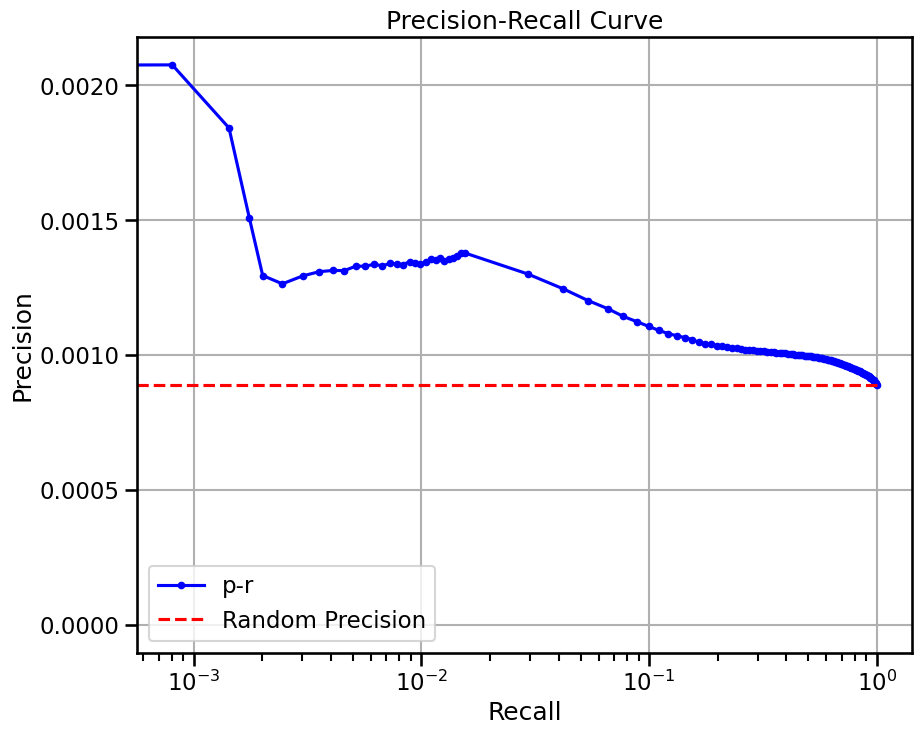

Using 16bit Automatic Mixed Precision (AMP)


GPU available: True (cuda), used: True


TPU available: False, using: 0 TPU cores


IPU available: False, using: 0 IPUs


HPU available: False, using: 0 HPUs


/pasteur/appa/homes/jkalfon/scPRINT/scprint/tasks/grn.py:165: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  organisms=[subadata.obs['organism_ontology_term_id'][0]],


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


SLURM auto-requeueing enabled. Setting signal handlers.


Predicting: |          | 0/? [00:00<?, ?it/s]

base enrichment


In [5]:
metrics = {}
clf_omni = None
for celltype in CELLTYPES:
    grn_inferer = GRNfer(model, adata[adata.X.sum(1) > 500],
                         how="random expr",
                         preprocess="softmax",
                         head_agg='mean',
                         filtration="none",
                         forward_mode="none",
                         organisms=['NCBITaxon:9606','NCBITaxon:10090'],
                         num_genes=2200,
                         max_cells=MAXCELLS,
                         doplot=False,
                         batch_size=32,
                         )
    grn = grn_inferer(layer=list(range(model.nlayers))[:], cell_type=celltype)
    grn.var.index = make_index_unique(grn.var['symbol'].astype(str))
    metrics[celltype+'_scprint'] = BenGRN(grn).scprint_benchmark()
    grn_inferer = GRNfer(model, adata[adata.X.sum(1) > 500],
                         how="most var across",
                         preprocess="softmax",
                         head_agg='none',
                         filtration="none",
                         forward_mode="none",
                         organisms=['NCBITaxon:9606','NCBITaxon:10090'],
                         num_genes=NUM_GENES,
                         max_cells=MAXCELLS,
                         doplot=False,
                         batch_size=32,
                         )
    grn = grn_inferer(layer=list(range(model.nlayers))[:], cell_type=celltype)
    grn.var.index = make_index_unique(grn.var['symbol'].astype(str))
    grn.varp['all'] = grn.varp['GRN']
    grn.varp['GRN'] = grn.varp['GRN'].mean(-1)
    metrics[celltype+'_scprint_meanmostvar'] = BenGRN(grn).scprint_benchmark()
    
    if clf_omni == None:
        grn.varp['GRN'] = grn.varp['all']
        grn, m, clf_omni = train_classifier(grn, C=0.01, train_size=0.5, class_weight={
                                        1: 200, 0: 1}, shuffle=False)
        grn.varp['GRN'] = grn.varp['classified']
    else:
        grn.varp["GRN"] = clf_omni.predict_proba(
            grn.varp['all'].reshape(-1, grn.varp['all'].shape[-1])
        ).reshape(len(grn.var), len(grn.var), 2)[:, :, 1]
    metrics[celltype+'_scprint_class'] = BenGRN(grn).scprint_benchmark()

### we have 50% of the omnipath coming from protein interaction type stuff. the model doesn't get necessarily a ton better without it.

### we have 75% less sources in the transcript only dataset and similar amount of targets.

### in the end we get that most transcript level ground truth doesn't overlap the ppi level one. so dropping it would help in the results but on both side. and it should not help too much with EPR


In [ ]:
metrics

In [ ]:
res = []
for k, v in metrics.items():
    res.append([k.split('_')[-1], v['epr'], v['auprc'], v['rand_precision'], v['significant_enriched_TFtargets'], v.get('TF_enr', False), 'tf_' in k])

df = pd.DataFrame(res, columns=['name','EPR', 'AUPRC', 'RAND', 'TF_targ', 'TF_enr', 'TF_only'])
df